# Clustering - Population Density


### Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

In [2]:
pop_df = pd.read_csv('./datasets/Nairobi_Area_Population_Grid.csv')
pop_df = pop_df.drop(columns='Unnamed: 0')

pop_df.head(3)

,Lat,Lon,Population
0,-1.050139,36.698194,4.18689
1,-1.050139,36.699306,4.18689
2,-1.050139,36.699583,4.18689


---
### Clean

In [3]:
# try to filter up to 4 or 5 to drop for Population
pop_df_copy = pop_df[pop_df['Population']>4].copy()

---
### Model

In [12]:
def kmeans(X, n=8):
    
    '''
    Enter a dataframe (X_base) and amount of clusters (n) for kmeans>
    The function will 
        -fit a KMeans model will n clusters,
        -append cluster labels to X_base dataframe
        -create a centroids groupby object for graphing
    
    returns (dataframe with cluster labels, centroid groupby object)
    '''
    
    km = KMeans(n_clusters=n)
    km.fit(X)

    X_df = X
    X_df['clusters'] = km.labels_

    # create centroids for graphing
    centroids = X_df.groupby('clusters')[['Lat', 'Lon']].mean()
    return X_df, centroids, km

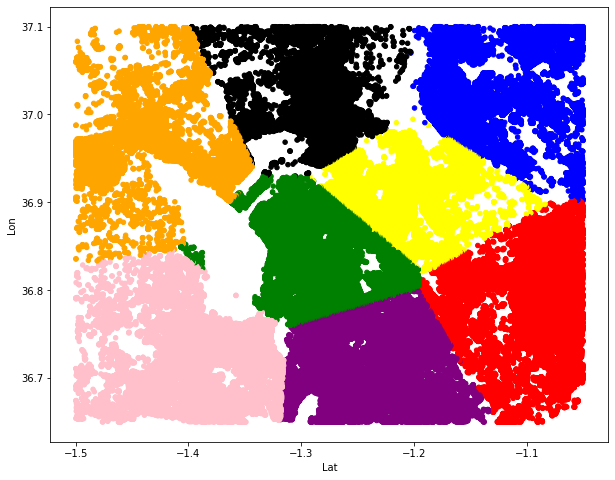

In [21]:
# X features from Latitude and Longitude
X = pop_df.drop("Population", axis=1)

# fit kmeans model
km = KMeans()
km.fit(X)

pop_df['clusters'] = km.labels_
centroids = pop_df.groupby('clusters')[['Lat', 'Lon']].mean()
    
## Plot scatter by cluster / color, and centroids
colors = ['red', 'green', 'blue', 'purple', 'black', 'yellow', 'orange', 'pink']
pop_df['color'] = pop_df['clusters'].map(lambda p: colors[p])

ax = X_df.plot(    
    kind="scatter", 
    x='Lat', y='Lon',
    figsize=(10,8),
    c = pop_df['color']
)

centroids.plot(
    kind="scatter", 
    x="Lat", y="Lon", 
    marker="*", c=["red", "green", "blue", "purple", "black", "yellow", "orange", "pink"], s=550,
    ax=ax
);

In [ ]:
silhouette_score(X, km.labels_)

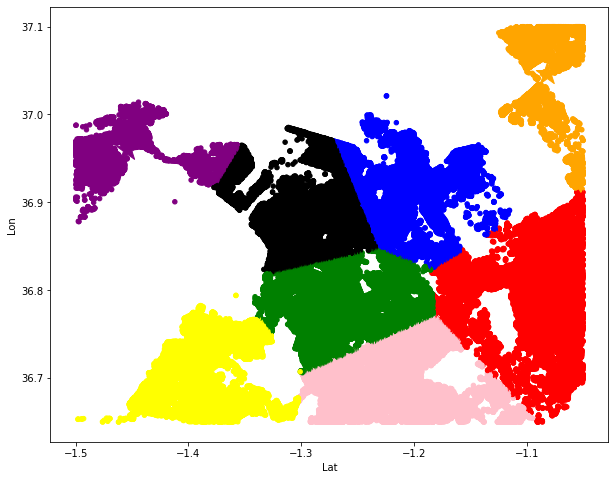

In [7]:
# X features from Latitude and Longitude
X = pop_df_copy.drop('Population', axis=1)

# fit kmeans model
X_df, centroids = kmeans(X)
    
## Plot scatter by cluster / color, and centroids
colors = ['red', 'green', 'blue', 'purple', 'black', 'yellow', 'orange', 'pink']
X_df['color'] = X_df['clusters'].map(lambda p: colors[p])

ax = X_df.plot(    
    kind="scatter", 
    x='Lat', y='Lon',
    figsize=(10,8),
    c = X_df['color']
)

centroids.plot(
    kind="scatter", 
    x="Lat", y="Lon", 
    marker="*", c=["red", "green", "blue", "purple", "black", "yellow", "orange", "pink"], s=550,
    ax=ax
);

In [ ]:
silhouette_score()

In [8]:
# see if scaling has an effect -- it shouldn't, but just in case
ss = StandardScaler()
Z_base = ss.fit_transform(X_base)

ValueError: could not convert string to float: 'black'